In [ ]:
'''Application Social Network

Workloads:
(1) compose-post
(2) read-home-timeline
(3) read-user-timeline
(4) mix workloads (different propotions of the above workloads)


Policy: 
k8s, NetMARKS, TraDE

'''
workloads = ['compose-post', 'read-home-timeline', 'read-user-timeline']
policy = ['k8s-burstable', 'NetMARKS', 'TraDE']
req_rates = [[50, 100, 200], # compose-post rquest rate; bottleneck ~250 req/s
            [200, 500, 1000], # read-home-timeline request rate
            [200, 500, 1000]] # read-user-timeline request rate

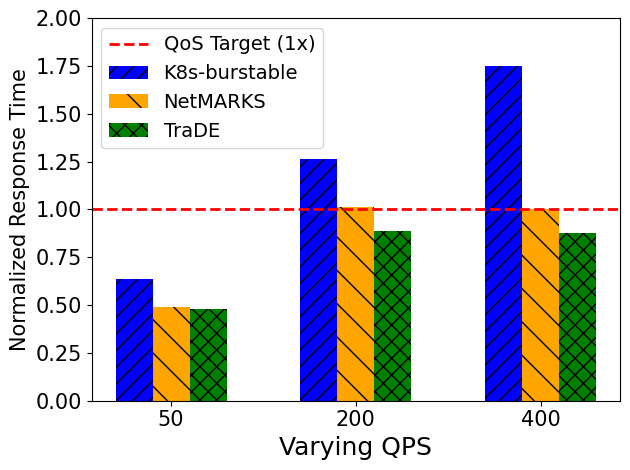

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data of compose-post workload
policy = ['K8s-burstable', 'NetMARKS', 'TraDE']
QPS1 = [50, 200, 400]
response_time_1 = {QPS1[0]: [510, 390, 385], QPS1[1]: [1010, 810, 710],  QPS1[2]: [1400, 800, 700]}
QoS_target = 800

# Normalizing response times by QoS target
response_time_normalized = {qps: [rt / QoS_target for rt in response_time_1[qps]] for qps in QPS1}

# Extract normalized response times for each QPS
response_time_QPS1 = response_time_normalized[QPS1[0]]
response_time_QPS2 = response_time_normalized[QPS1[1]]
response_time_QPS3 = response_time_normalized[QPS1[2]]

# Combine response times into a list for easier plotting
response_times = [response_time_QPS1, response_time_QPS2, response_time_QPS3]

# Plotting
fig, ax = plt.subplots()

bar_width = 0.2
x = np.arange(len(QPS1))  # The label locations
# hatch_patterns = ['/', 'o', 'x']  # Hatch styles for bars
hatch_patterns = ['//', '\\', 'xx']  # Hatch styles for bars

# Plot bars with hatching and color
for i, policy_name in enumerate(policy):
    ax.bar(x + i * bar_width, [rt[i] for rt in response_times], width=bar_width, label=policy_name,
           color=['blue', 'orange', 'green'][i], hatch=hatch_patterns[i])

# Add a red dashed line for the normalized QoS target (1x)
ax.axhline(y=1, color='red', linestyle='--', linewidth=2, label=f'QoS Target (1x)')

# Labeling
ax.set_xlabel('Varying QPS', fontsize=18)
ax.set_ylabel('Normalized Response Time', fontsize=15)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(QPS1, fontsize=15)
ax.set_ylim(0, 2)  # Adjust the y-axis limit for the normalized values

# Adjust tick labels
plt.yticks(fontsize=15)

# Legend
ax.legend(fontsize=14)

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()


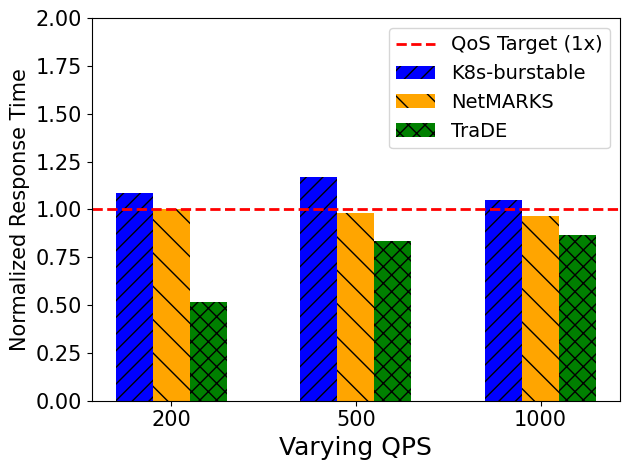

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Data of read-user-timeline.
policy = ['K8s-burstable', 'NetMARKS', 'TraDE']
QPS2 = [200, 500, 1000]
response_time_1 = {QPS2[0]: [650, 600, 310], QPS2[1]: [700, 590, 500],  QPS2[2]: [630, 580, 520]}
QoS_target = 600

# Normalizing response times by QoS target
response_time_normalized = {qps: [rt / QoS_target for rt in response_time_1[qps]] for qps in QPS2}

# Extract normalized response times for each QPS
response_time_QPS1 = response_time_normalized[QPS2[0]]
response_time_QPS2 = response_time_normalized[QPS2[1]]
response_time_QPS3 = response_time_normalized[QPS2[2]]

# Combine response times into a list for easier plotting
response_times = [response_time_QPS1, response_time_QPS2, response_time_QPS3]

# Plotting
fig, ax = plt.subplots()

bar_width = 0.2
x = np.arange(len(QPS2))  # The label locations
# hatch_patterns = ['/', 'o', 'x']  # Hatch styles for bars
hatch_patterns = ['//', '\\', 'xx']  # Hatch styles for bars


# Plot bars with hatching and color
for i, policy_name in enumerate(policy):
    ax.bar(x + i * bar_width, [rt[i] for rt in response_times], width=bar_width, label=policy_name,
           color=['blue', 'orange', 'green'][i], hatch=hatch_patterns[i])

# Add a red dashed line for the normalized QoS target (1x)
ax.axhline(y=1, color='red', linestyle='--', linewidth=2, label=f'QoS Target (1x)')

# Labeling
ax.set_xlabel('Varying QPS', fontsize=18)
ax.set_ylabel('Normalized Response Time', fontsize=15)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(QPS2, fontsize=15)
ax.set_ylim(0, 2)  # Adjust the y-axis limit for the normalized values

# Adjust tick labels
plt.yticks(fontsize=15)

# Legend
ax.legend(fontsize=14)

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()


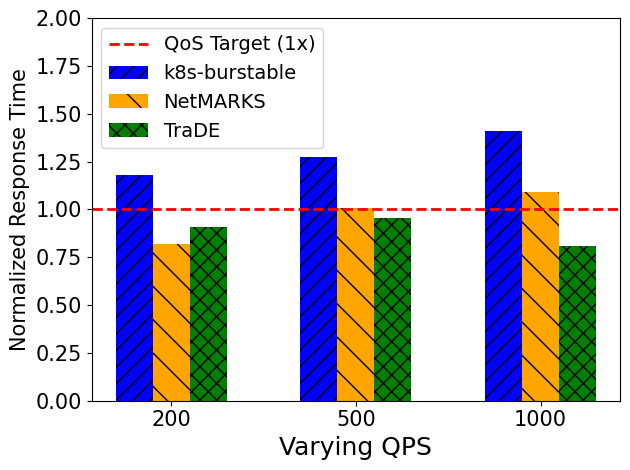

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data of read-home-timeline workload
policy = ['k8s-burstable', 'NetMARKS', 'TraDE']
QPS3 = [200, 500, 1000]
response_time_1 = {QPS3[0]: [1300, 900, 1000], QPS3[1]: [1400, 1110, 1050],  QPS3[2]: [1550, 1200, 890]}
QoS_target = 1100

# Normalizing response times by QoS target
response_time_normalized = {qps: [rt / QoS_target for rt in response_time_1[qps]] for qps in QPS3}

# Extract normalized response times for each QPS
response_time_QPS1 = response_time_normalized[QPS1[0]]
response_time_QPS2 = response_time_normalized[QPS1[1]]
response_time_QPS3 = response_time_normalized[QPS1[2]]

# Combine response times into a list for easier plotting
response_times = [response_time_QPS1, response_time_QPS2, response_time_QPS3]

# Plotting
fig, ax = plt.subplots()

bar_width = 0.2
x = np.arange(len(QPS3))  # The label locations
# hatch_patterns = ['/', 'o', 'x']  # Hatch styles for bars
hatch_patterns = ['//', '\\', 'xx']  # Hatch styles for bars

# Plot bars with hatching and color
for i, policy_name in enumerate(policy):
    ax.bar(x + i * bar_width, [rt[i] for rt in response_times], width=bar_width, label=policy_name,
           color=['blue', 'orange', 'green'][i], hatch=hatch_patterns[i])

# Add a red dashed line for the normalized QoS target (1x)
ax.axhline(y=1, color='red', linestyle='--', linewidth=2, label=f'QoS Target (1x)')

# Labeling
ax.set_xlabel('Varying QPS', fontsize=18)
ax.set_ylabel('Normalized Response Time', fontsize=15)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(QPS1, fontsize=15)
ax.set_ylim(0, 2)  # Adjust the y-axis limit for the normalized values

# Adjust tick labels
plt.yticks(fontsize=15)

# Legend
ax.legend(fontsize=14)

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()
